# Regression prediction of homes prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.feature_selection as fs
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%config InlineBackend.figure_format = 'png'
%matplotlib inline
sns.set()
file1 = '../../datasets/ames-iowa-housing-prices-dataset/train1.csv'
file2 = '../../datasets/ames-iowa-housing-prices-dataset/test1.csv'

In [2]:
train = pd.read_csv(file1)
test = pd.read_csv(file2)
def reload():
    train = pd.read_csv(file1)
    test = pd.read_csv(file2)
reload()

In [3]:
len(train.columns)

81

In [4]:
train.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

# 1. Explore relationships of target variable, SalePrice

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


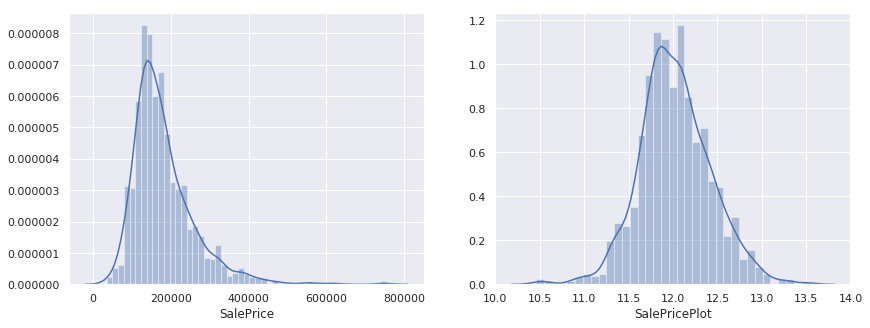

In [5]:
#sns.distplot(train['SalePrice'])
print(train['SalePrice'].describe())
# set up our figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
sns.distplot(train.SalePrice, ax=axes[0])
train['SalePricePlot'] = np.log1p(train.SalePrice)
sns.distplot(train.SalePricePlot, ax=axes[1])



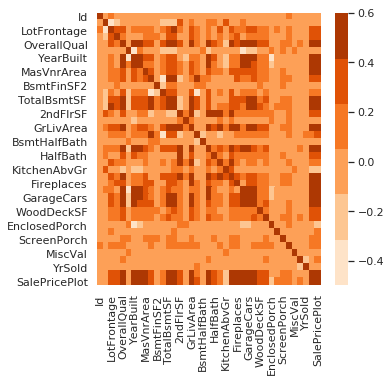

In [6]:
corrmat = train.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corrmat, vmax=.6, cmap=sns.color_palette("Oranges"))

### Lets inspect some relationships between Variables and SalePrice


In [7]:
def plot_with_trend(x,y,title=None):
    z=np.polyfit(x,y,3)
    p = np.poly1d(z)
    plt.figure(figsize=(8,5))
    plt.plot( x, p(x), marker='*')
    plt.scatter(x, y, c='r', marker='+')

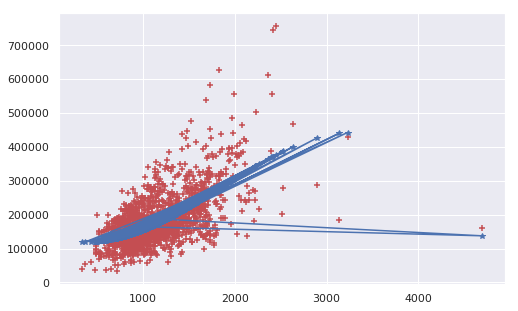

In [8]:
x = train['1stFlrSF']
y = train.SalePrice
plot_with_trend(train['1stFlrSF'], train.SalePrice, title="Looking for Outliers")
df_slice = train.copy(deep=True)

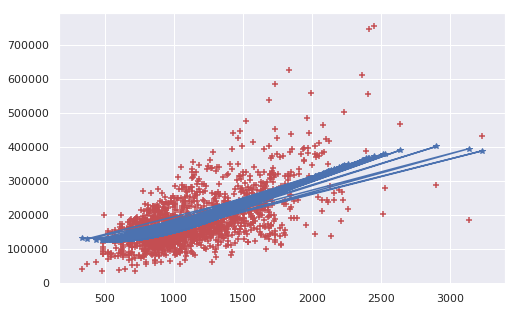

In [9]:
# lets plot that again after removing some outliers
train = train[train['1stFlrSF']<4000]
plot_with_trend(train['1stFlrSF'], train.SalePrice, title="Removed > 400sf")

We can see after removing that single outlier how much our linear fit changed

## Let's do a first try at a Regression Model for simple feature selection
We will try a simple analysis using the most highly correlated values and see what kind of results we get

In [10]:

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Note to self, don't accidentally include the target feature in the training data set
features = [a for a in train.corr().SalePrice.sort_values(ascending=False)[1:10].index]

In [72]:
def get_best_fit(selected_features):
    """
    Simple best fit function to wrap all of the boiler plate for calling regression
    functions, takes only a list of features to be analyzed
    """
    X = train[selected_features]
    y = train['SalePrice']
    X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=.33)
    regressor=LinearRegression()
    regressor.fit(X_train, y_train)
    y_prediction = regressor.predict(X_test)
    linear_RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=y_prediction))
    
    
    regressor = DecisionTreeRegressor(max_depth=100)
    regressor.fit(X_train, y_train)
    y_prediction_dt = regressor.predict(X_test)
    decision_tree_RMSE=sqrt(mean_squared_error(y_true=y_test, y_pred=y_prediction_dt))
    return {
        'Linear': linear_RMSE,
        "DecisionTree": decision_tree_RMSE,
        'y_test': y_test,
        'y_prediction':y_prediction,
        'y_prediction_dt': y_prediction_dt
    }
    

## Analyzing the results of our simple regression model
In analyzing the results, we will compare the results of the predicted values with the known values

In [73]:
results = get_best_fit(features)
# Lets run it 10 times for a better estimate of the average RMS across multiple random samplings
results = pd.DataFrame([get_best_fit(features) for x in range(25)])

We can see that decision tree does noticeably better than the simple linear regression, with an average rmse of 

,DecisionTree,Linear
count,25.000000,25.000000
mean,5687.319650,24556.632203
std,3456.268000,2568.019909
min,1053.680271,21195.227712
25%,2567.702753,22918.053854
50%,4664.774705,23711.458132
75%,8970.319025,25844.447854
max,11119.019604,29464.892744


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12dcaa048>,
      dtype=object)

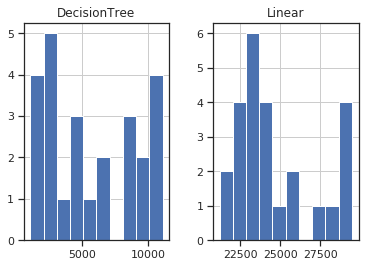

In [74]:
results.describe()
results.hist()

In [75]:
results = get_best_fit(features)
# Lets run it 10 times for a better estimate of the average 
# RMS across multiple random samplings
results = pd.DataFrame([get_best_fit(features) for x in range(25)])
hist_results = get_best_fit(features)
hist_predicted, hist_actual, hist_predicted_dt =\
hist_results['y_prediction'], hist_results['y_test'], hist_results['y_prediction_dt']

,DecisionTree,Linear
count,25.000000,25.000000
mean,5367.000346,24267.195473
std,3646.198517,2809.194714
min,1548.633771,19330.413496
25%,2637.111404,22188.724094
50%,3957.607955,24109.916819
75%,8945.574830,26383.843707
max,14583.161494,29812.504824


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12deb7470>,
      dtype=object)

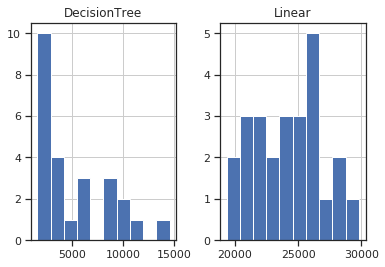

In [76]:
results.describe()
results.hist()

## Notice there is a *large* difference between the standard regression and decision tree regressor RMSE measures of accuracy over 10 runs

When we plot the data side be side we can see how much closer the distributions are between

<Figure size 864x360 with 0 Axes>

[None, None]

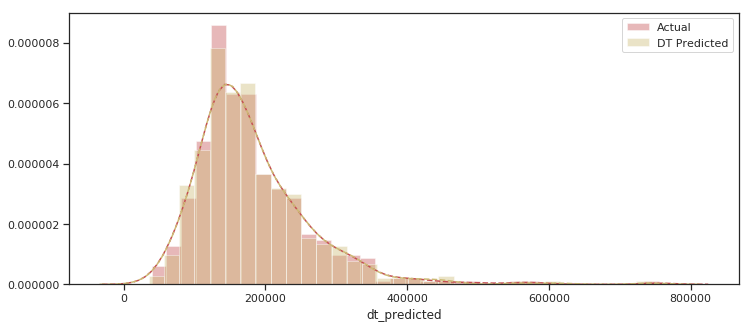

In [77]:
comparison = pd.DataFrame({'reg_predicted':hist_predicted,'dt_predicted':hist_predicted_dt, 'actual':hist_actual})
plt.figure(figsize=(12,5))
sns.set(style='ticks')
ax1 = sns.distplot(comparison['actual'], color='r', label='Actual')
sns.distplot(comparison['dt_predicted'], color='y', label='DT Predicted')
[line.set_linestyle("--") for line in ax1.lines]


plt.legend()

<Figure size 864x360 with 0 Axes>

[None, None]

[None, None]

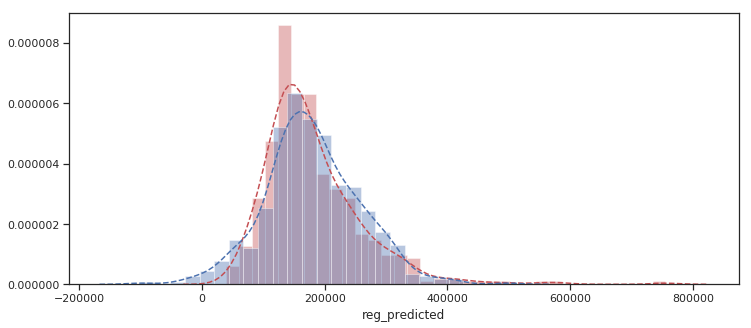

In [78]:
plt.figure(figsize=(12,5))
sns.set(style='ticks')
ax1 = sns.distplot(comparison['actual'], color='r', label='Actual')
ax2 = sns.distplot(comparison['reg_predicted'],color='b', label='regression')

[line.set_linestyle("--") for line in ax1.lines]
[line.set_linestyle("-.") for line in ax3.lines]

# Based on these results, the standard linear regression model is not fitting the data as well as the decision tree.

The decision tree model's results more closely approximate the distribution of the actual data, while the linear regression's model seems to exhibit strong normalization characteristics, underfitting data near the mean sale price, and overfitting on the tails, even producing negatively fit values. It seems that some parameters could possibly be tweeked to prevent it from being affected by the extreme negative and possitive ends of the data.

While I am not certain this analysis is that statistically rigorous, I can report that the decisiontree regressor produced a significantly lower RMSE value averaged over 10 pseudorandom trials of the data than did the linear regressor, this fact combined with the more closely approximated output result distribution, leads me to place my confidence in the decisiontree model. I have plans to follow up with a more finely tuned version of the 